Monta o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importando as bibliotecas básicas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# carrega o dataset de boston
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
# descrição do dataset
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()
data.to_csv('data.csv')

In [4]:
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 Utilizando o **Pandas Profiling** para essa etapa:

In [ ]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [6]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [7]:
# executando o profile
profile = ProfileReport(data, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
# profile -> Disponivel os resultados no .HTML

In [8]:
# Check missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# estatística descritiva
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


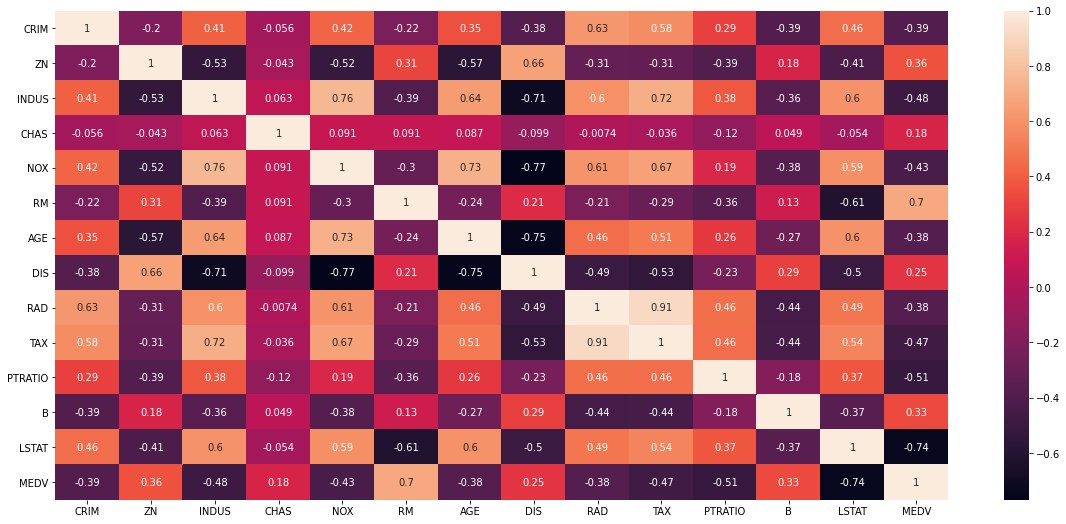

In [10]:
# Calcule a correlação e usando o método heatmap do seaborn
correlacoes = data.corr()
plt.figure(figsize=(20, 9))
sns.heatmap(data=correlacoes, annot=True)

In [11]:
# Import o Plot.ly
import plotly.express as px

Apresentando as relações dos valores entre os parâmetro do dataset.

In [12]:
# Mostrando o RM vs MEDV (Número de quartos e valor médio do imóvel)
fig = px.scatter(data, x=data.RM, y=data.MEDV)
fig.show()

In [13]:
# Mostrando o LSTAT vs MEDV (índice de status mais baixo da população e preço do imóvel)
fig = px.scatter(data, x=data.LSTAT, y=data.MEDV)
fig.show()

In [14]:
# Mostrando o PTRATIO vs MEDV (percentual de proporção de alunos para professores)
fig = px.scatter(data, x=data.PTRATIO, y=data.MEDV)
fig.show()

In [15]:
# estatística descritiva da variável RM
data.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [16]:
# visualizando a distribuição da variável RM
import plotly.figure_factory as ff

labels = ['Distribuição da variável RM (número de quartos)']
fig = ff.create_distplot([data.RM], labels, bin_size=.2)
fig.show()

In [17]:
# Visualizando outliers na variável RM
fig = px.box(data, y='RM')
fig.update_layout( width=800,height=800)
fig.show()

In [18]:
# estatística descritiva da variável MEDV
data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [19]:
# visualizando a distribuição da variável MEDV
labels = ['Distribuição da variável MEDV (preço médio do imóvel)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=0.2)
fig.show()

In [20]:
# Analisando a assimetria utilizando o método stats da scipy
from scipy import stats

In [21]:
# imprime o coeficiente de pearson;
# Valor entre -1 e 1 - distribuição simétrica;
# Valor maior que 1 - distribuição assimétrica positiva;
# Valor maior que -1 - distribuição assimétrica negativa;

stats.skew(data.MEDV)

1.104810822864635

In [22]:
# Histogram da variável MEDV (variável alvo)
fig = px.histogram(data, x="MEDV", nbins=50, opacity=0.50)
fig.show()

In [23]:
# Visualizando outliers na variável MEDV

fig = px.box(data, y='MEDV')
fig.update_layout( width=800,height=800)
fig.show()

In [24]:
# estatistica descritiva das variáveis
data[['PTRATIO','LSTAT','RM']].describe()

,PTRATIO,LSTAT,RM
count,506.000000,506.000000,506.000000
mean,18.455534,12.653063,6.284634
std,2.164946,7.141062,0.702617
min,12.600000,1.730000,3.561000
25%,17.400000,6.950000,5.885500
50%,19.050000,11.360000,6.208500
75%,20.200000,16.955000,6.623500
max,22.000000,37.970000,8.780000


In [25]:
# imprimindo os 20 maiores valores de MEDV
data[['RM','LSTAT','PTRATIO','MEDV']].nlargest(20, 'MEDV')

,RM,LSTAT,PTRATIO,MEDV
161,7.489,1.73,14.7,50.0
162,7.802,1.92,14.7,50.0
163,8.375,3.32,14.7,50.0
166,7.929,3.70,14.7,50.0
186,7.831,4.45,17.8,50.0
195,7.875,2.97,14.4,50.0
204,8.034,2.88,14.7,50.0
225,8.725,4.63,17.4,50.0
257,8.704,5.12,13.0,50.0
267,8.297,7.44,13.0,50.0


In [26]:
# filtra os top 16 maiores registro da coluna MEDV
top16 = data.nlargest(16, 'MEDV').index
top16

Int64Index([161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
            370, 371, 372],
           dtype='int64')

In [27]:
# remove os valores listados em top16
data.drop(top16, inplace=True)

In [28]:
# visualizando a distribuição da variável MEDV após a remoção dos top 16
labels = ['Distribuição da variável MEDV (número de quartos)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

In [29]:
# Histogram da variável MEDV (variável alvo)
fig = px.histogram(data, x="MEDV", nbins=100, opacity=0.50)
fig.show()

In [30]:
# imprimindo o novo coeficiente de pearson
stats.skew(data.MEDV)

0.7732836030909053

**Definindo um Baseline**


In [31]:
# converte os dados
data.RM = data.RM.astype(int)
data.RM

0      6
1      6
2      7
3      6
4      7
      ..
501    6
502    6
503    6
504    6
505    6
Name: RM, Length: 490, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    float64
 4   NOX      490 non-null    float64
 5   RM       490 non-null    int64  
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    float64
 9   TAX      490 non-null    float64
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  MEDV     490 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 57.4 KB


In [33]:
# estatística descritiva da coluna numero de quartos
data.RM.describe()

count    490.000000
mean       5.740816
std        0.737657
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: RM, dtype: float64

In [34]:
# definindo a regra para categorizar os dados
categorias = []

In [35]:
# preenchendo a lista categorias
for i in data.RM.iteritems():
  valor = (i[1])
  if valor <= 4:
    categorias.append('Pequeno')
  elif valor < 7:
    categorias.append('Medio')
  else:
    categorias.append('Grande')

In [36]:
# cria a coluna categorias
data['categorias'] = categorias

In [37]:
# imprime a contagem de categorias
data.categorias.value_counts()

Medio      424
Grande      52
Pequeno     14
Name: categorias, dtype: int64

In [38]:
# agrupa as categorias e calcula as médias
medias_categorias = data.groupby(by='categorias')['MEDV'].mean()
medias_categorias

categorias
Grande     35.719231
Medio      20.130425
Pequeno    14.921429
Name: MEDV, dtype: float64

In [39]:
# criando o dicionario com chaves medio, grande e pequeno e seus valores
dic_baseline = {'Grande': medias_categorias[0], 'Medio': medias_categorias[1], 'Pequeno': medias_categorias[2]}
dic_baseline

{'Grande': 35.71923076923077,
 'Medio': 20.1304245283019,
 'Pequeno': 14.921428571428574}

In [40]:
# cria a função retorna baseline
def retorna_baseline(num_quartos):
  if num_quartos <= 4:
    return dic_baseline.get('Pequeno')
  elif num_quartos < 7:
    return dic_baseline.get('Medio')
  else:
    return dic_baseline.get('Grande')

In [41]:
# chama a função retorna baseline
retorna_baseline(3)

14.921428571428574

In [42]:
for i in data.RM.iteritems():
  n_quartos = i[1]
  print('Número de quartos é: {} , Valor médio: {}'.format(n_quartos,retorna_baseline(n_quartos)))

Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número d

In [43]:
# imprime as 5 primeiras linhas do dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,categorias
0,0.00632,18.0,2.31,0.0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Medio
1,0.02731,0.0,7.07,0.0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Medio
2,0.02729,0.0,7.07,0.0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Grande
3,0.03237,0.0,2.18,0.0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Medio
4,0.06905,0.0,2.18,0.0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Grande


**Trabalhando com Baseline**

Preparando os dados

In [46]:
# remove as colunas colineares, variavel alvo e a coluna categorias
X = data.drop(['RAD','TAX','MEDV','DIS','AGE','ZN','categorias'], axis=1)
X.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,0.538,6,15.3,396.90,4.98
1,0.02731,7.07,0.0,0.469,6,17.8,396.90,9.14
2,0.02729,7.07,0.0,0.469,7,17.8,392.83,4.03
3,0.03237,2.18,0.0,0.458,6,18.7,394.63,2.94
4,0.06905,2.18,0.0,0.458,7,18.7,396.90,5.33


In [47]:
# variável 'y' é nossa variável alvo
y = data['MEDV']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Separando o conjunto de testes e de treino



In [48]:
# carrega o método train_test_split
from sklearn.model_selection import train_test_split

In [49]:
# divide os dados entre o conjunto de treino e teste, 80% e 20% respectivamente.
# define qualquer valor para o parâmetro random_state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [50]:
# imprime a quantidade de linhas dos conjuntos
print ('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (392, 8)
X_test: numero de linhas e colunas: (98, 8)
y_train: numero de linhas e colunas: (392,)
y_test: numero de linhas e colunas: (98,)
